<a href="https://colab.research.google.com/github/topavasquez/ClasificadorRopa/blob/main/RopaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Se descarga el set de datos Fashion MNIST de Zalando
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [ ]:
# Obtenemos los datos de entrenamiento y prueba
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [ ]:
# Etiquetas de las 10 categorías posibles
nombres_clases = metadatos.features['label'].names

In [ ]:
# Función de normalización para los datos (de 0-255 a 0-1)
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255  # Normalización
    return imagenes, etiquetas


In [ ]:
# Normalizar los datos de entrenamiento y pruebas
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

In [ ]:
# Convertir a arrays de NumPy para usar con KNN
def convertir_a_numpy(dataset):
    imagenes = []
    etiquetas = []
    for imagen, etiqueta in dataset:
        imagenes.append(imagen.numpy().reshape(28 * 28))  # Aplanar las imágenes
        etiquetas.append(etiqueta.numpy())
    return np.array(imagenes), np.array(etiquetas)

In [ ]:
# Convertir los datos de entrenamiento y prueba a NumPy
X_train, y_train = convertir_a_numpy(datos_entrenamiento)
X_test, y_test = convertir_a_numpy(datos_pruebas)

In [ ]:
# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Aqui se pueden ajustar los vecinos (k)

In [ ]:
# Entrenar el modelo KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Realizar predicciones
y_pred = knn.predict(X_test)

In [ ]:
# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy * 100:.2f}%")

Precisión del modelo KNN: 85.41%


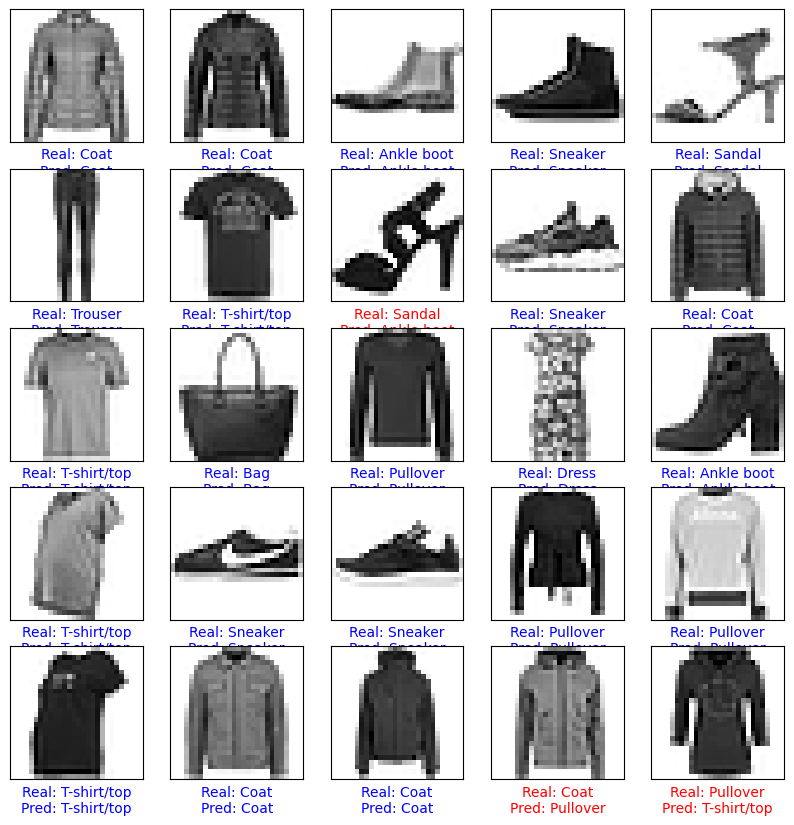

In [ ]:
# Visualizar algunas predicciones
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Mostrar la imagen
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)

    # Etiqueta real y predicción
    plt.xlabel(f"Real: {nombres_clases[y_test[i]]}\nPred: {nombres_clases[y_pred[i]]}",
               color="blue" if y_test[i] == y_pred[i] else "red")
plt.show()


In [ ]:
# Probar una imagen suelta
imagen = X_test[4].reshape(1, -1)  # Escoger una imagen del conjunto de prueba
prediccion = knn.predict(imagen)

In [ ]:
print(f"Predicción para la imagen seleccionada: {nombres_clases[prediccion[0]]}")

Predicción para la imagen seleccionada: Sandal


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación (precisión, recall, F1-score)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=nombres_clases))


Matriz de Confusión:
[[853   1  16  15   3   0 106   1   5   0]
 [  9 971   2  11   4   0   2   0   1   0]
 [ 27   2 812   8  78   0  73   0   0   0]
 [ 48   7  22 855  30   0  36   0   2   0]
 [  5   3 141  24 743   0  82   0   2   0]
 [  1   0   0   1   0 835   3  90   0  70]
 [177   3 132  21  63   0 595   0   9   0]
 [  0   0   0   0   0   3   0 952   0  45]
 [  7   1  10   3   3   1  16   6 952   1]
 [  0   0   0   0   0   2   0  24   1 973]]

Reporte de Clasificación:
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.85      0.80      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.72      0.81      0.76      1000
       Dress       0.91      0.85      0.88      1000
        Coat       0.80      0.74      0.77      1000
      Sandal       0.99      0.83      0.91      1000
       Shirt       0.65      0.59      0.62      1000
     Sneaker       0.89      0.95      0.92      1000
         Bag       0.98      0.95 

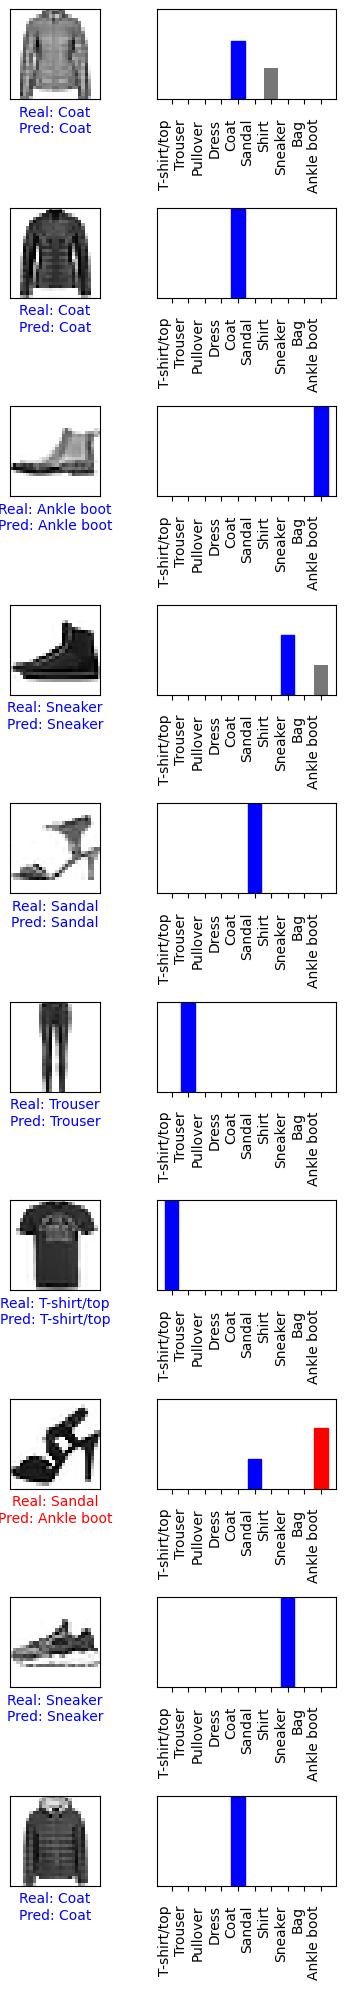

In [ ]:
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
    """
    Gráfica de barras para visualizar las predicciones de probabilidades.
    """
    plt.grid(False)
    desplazamiento = 0.5
    plt.xticks(range(10), nombres_clases, rotation=90, ha="right")  # Rotación y alineación
    plt.tick_params(axis='x', pad=10)  # Espaciado entre las etiquetas y el eje X
    plt.yticks([])  # Sin marcas en el eje Y
    grafica = plt.bar(range(10), arr_predicciones[i], color="#777777")  # Barras de probabilidad
    plt.ylim([0, 1])  # Límites del eje Y entre 0 y 1
    etiqueta_prediccion = np.argmax(arr_predicciones[i])  # Índice de la categoría predicha

    # Resaltar las barras de la predicción y la etiqueta real
    grafica[etiqueta_prediccion].set_color('red')  # Predicción en rojo
    grafica[etiqueta_real[i]].set_color('blue')  # Real en azul



def graficar_imagen(i, predicciones, etiquetas_reales, imagenes):
    """
    Muestra la imagen junto con la predicción y la etiqueta real.
    """
    plt.grid(False)
    plt.xticks([])  # Sin marcas en el eje X
    plt.yticks([])  # Sin marcas en el eje Y
    plt.imshow(imagenes[i].reshape(28, 28), cmap=plt.cm.binary)  # Imagen en escala de grises
    etiqueta_prediccion = np.argmax(predicciones[i])  # Predicción
    color = 'blue' if etiqueta_prediccion == etiquetas_reales[i] else 'red'
    plt.xlabel(f"Real: {nombres_clases[etiquetas_reales[i]]}\nPred: {nombres_clases[etiqueta_prediccion]}",
               color=color)


# Predicciones con probabilidades para KNN
# Debido a que KNN no da probabilidades por defecto, usaremos `predict_proba`
# Necesita weights='distance' en la inicialización de KNN
knn_probabilidades = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_probabilidades.fit(X_train, y_train)
predicciones_proba = knn_probabilidades.predict_proba(X_test)

# Configurar número de filas y columnas para las subparcelas
num_imagenes = 10  # Número de imágenes a mostrar
filas = num_imagenes  # Una fila por imagen (imagen + gráfico)
columnas = 2  # Dos columnas: una para la imagen y otra para el gráfico

plt.figure(figsize=(2 * columnas, 2 * filas))  # Ajustar el tamaño de la figura

for i in range(num_imagenes):
    # Se asigna subparcela para la imagen
    plt.subplot(filas, columnas, 2 * i + 1)
    graficar_imagen(i, predicciones_proba, y_test, X_test)

    # Se asigna subparcela para el gráfico de barras
    plt.subplot(filas, columnas, 2 * i + 2)
    graficar_valor_arreglo(i, predicciones_proba, y_test)

plt.tight_layout()
plt.show()

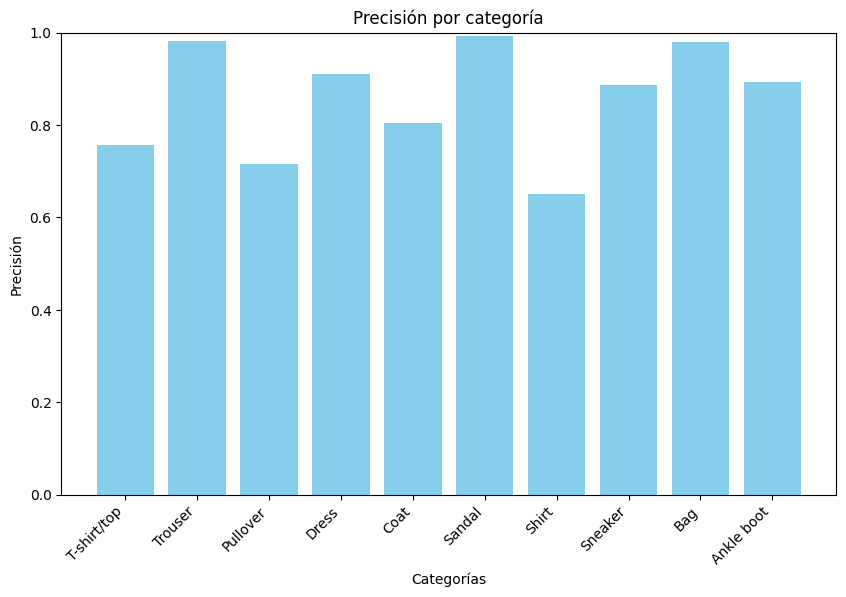

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generar un reporte de clasificación
reporte = classification_report(y_test, y_pred, target_names=nombres_clases, output_dict=True)

# Convertir a DataFrame para facilitar la visualización
df_reporte = pd.DataFrame(reporte).transpose()

# Graficar la precisión por categoría
plt.figure(figsize=(10, 6))
plt.bar(df_reporte.index[:-3], df_reporte['precision'][:-3], color="skyblue")
plt.title("Precisión por categoría")
plt.xlabel("Categorías")
plt.ylabel("Precisión")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.show()


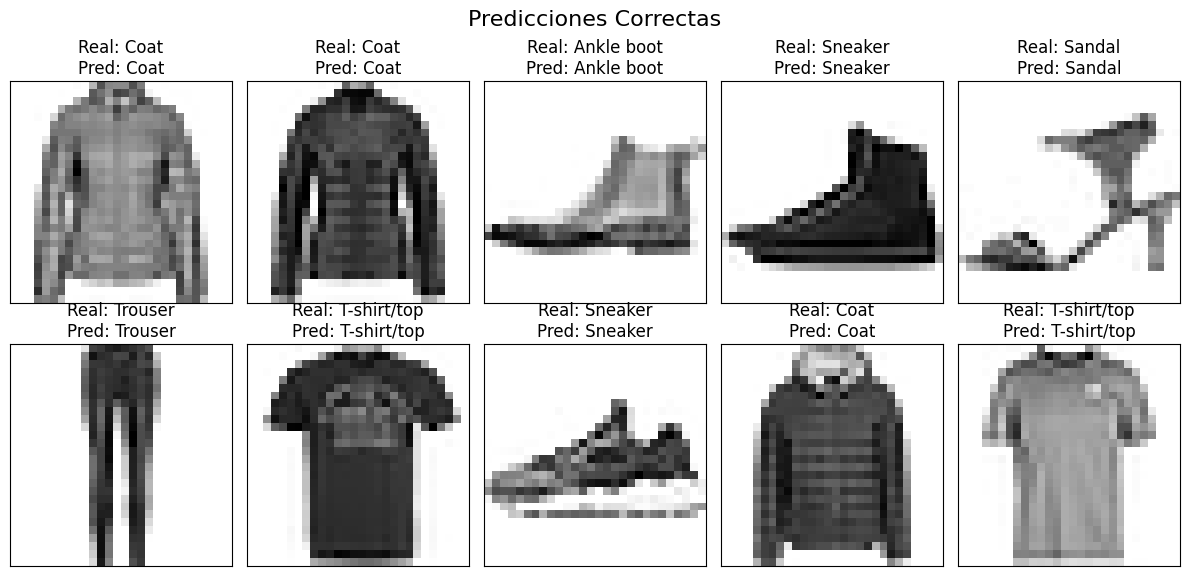

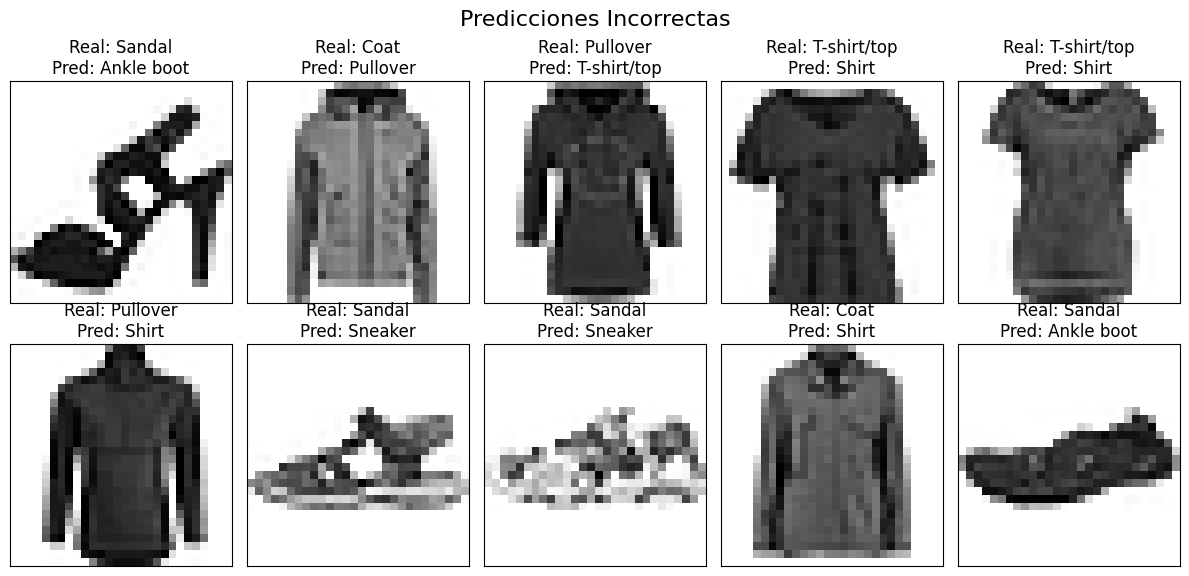

In [ ]:
correctas = [i for i in range(len(y_test)) if y_test[i] == y_pred[i]]
incorrectas = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]

def graficar_imagenes(indices, titulo):
    plt.figure(figsize=(12, 6))
    plt.suptitle(titulo, fontsize=16)
    for i, idx in enumerate(indices[:10]):  # Mostrar solo 10 imágenes
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap=plt.cm.binary)
        plt.title(f"Real: {nombres_clases[y_test[idx]]}\nPred: {nombres_clases[y_pred[idx]]}")
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

# Graficar
graficar_imagenes(correctas, "Predicciones Correctas")
graficar_imagenes(incorrectas, "Predicciones Incorrectas")


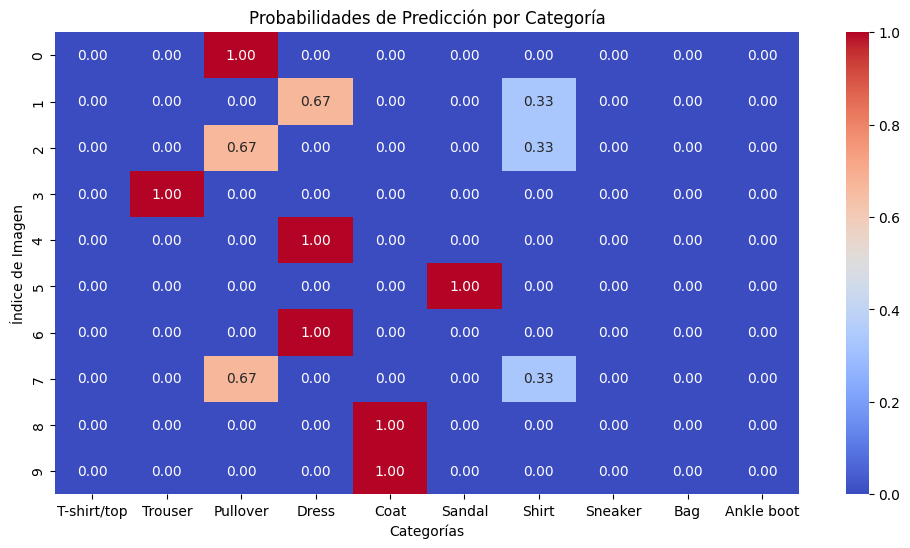

In [ ]:
import seaborn as sns

# Seleccionar un subconjunto de imágenes
subset_indices = np.random.choice(len(y_test), size=10, replace=False)
subset_proba = predicciones_proba[subset_indices]

# Crear un DataFrame para las probabilidades
df_proba = pd.DataFrame(subset_proba, columns=nombres_clases)

# Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_proba, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, xticklabels=nombres_clases)
plt.title("Probabilidades de Predicción por Categoría")
plt.ylabel("Índice de Imagen")
plt.xlabel("Categorías")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Calcular la precisión global
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión global del modelo: {accuracy * 100:.2f}%")



Precisión global del modelo: 85.41%


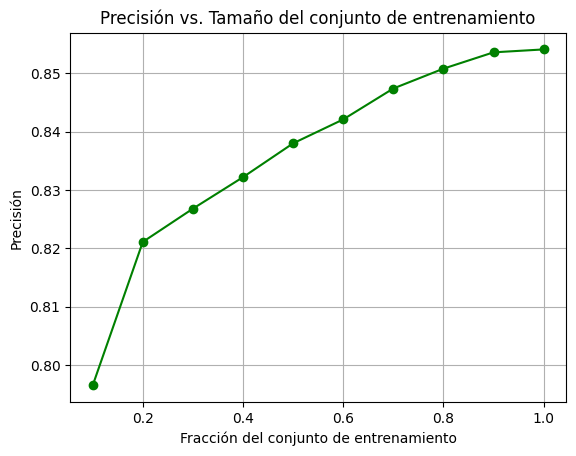

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Lista para almacenar la precisión
sizes = np.linspace(0.1, 1.0, 10)  # Probar con diferentes fracciones del conjunto de entrenamiento
accuracies = []

# Probar con diferentes tamaños de conjunto de entrenamiento
for size in sizes:
    subset_size = int(size * len(X_train))  # Tamaño del subconjunto de entrenamiento
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_subset, y_train_subset)  # Entrenar con el subconjunto
    y_pred = knn.predict(X_test)  # Hacer predicciones
    accuracy = accuracy_score(y_test, y_pred)  # Calcular precisión
    accuracies.append(accuracy)  # Almacenar precisión

# Graficar precisión vs. tamaño del conjunto de entrenamiento
plt.plot(sizes, accuracies, marker='o', color='g', label="Precisión")
plt.title('Precisión vs. Tamaño del conjunto de entrenamiento')
plt.xlabel('Fracción del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Listas para almacenar resultados
k_values = range(1, 21)  # Probar con valores de k entre 1 y 20
accuracies = []

# Probar diferentes valores de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Entrenar el modelo con el valor de k
    y_pred = knn.predict(X_test)  # Hacer predicciones
    accuracy = accuracy_score(y_test, y_pred)  # Calcular precisión
    accuracies.append(accuracy)  # Almacenar precisión

# Graficar precisión vs. k
plt.plot(k_values, accuracies, marker='o', color='b', label="Precisión")
plt.title('Precisión vs. Número de vecinos (k)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()
